In [9]:
from Kmeans import *
from sklearn.preprocessing import MinMaxScaler

In [10]:
data = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,3:]
data = MinMaxScaler().fit_transform(data)
labels_true = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,0]

In [15]:
model = Kmeans(k=153, max_iters=300)
model.fit(data)
labels_computed = model.labels_
print(f"\n\nNMI: {NMI(labels_true, labels_computed)}")

100%|██████████| 300/300 [59:26<00:00, 11.89s/it]

NMI: 0.20320766293930403



In [16]:
model.errors[-5:]

[0.00562550079215652,
 0.005393915851341436,
 0.005943709208303665,
 0.005399640119400614,
 0.005039188612980443]

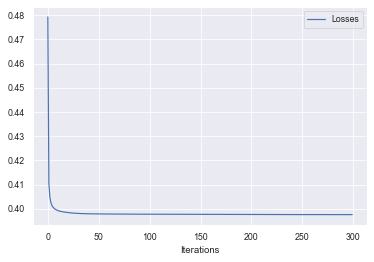

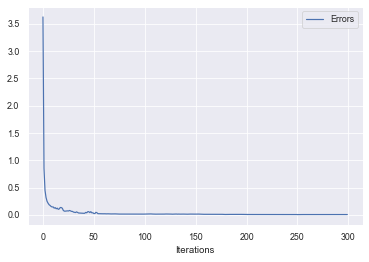

In [17]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

plt.plot(model.losses, label="Losses")
plt.xlabel("Iterations")
plt.legend()
plt.show()
plt.plot(model.errors, label="Errors")
plt.xlabel("Iterations")
plt.legend()
plt.show()


## Test with different clustering algorithms

In [19]:
from sklearn import cluster 
from sklearn import mixture

In [21]:
start = datetime.now()  # runtime

clustering = cluster.KMeans(n_clusters=153).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(clusters_sklearn, labels_true))

Finished in 0:07:21.959954
0.15885404442616655


### Agreement between sklearn's and custom kmeans labels

In [8]:
print(NMI(clusters_sklearn, labels_computed)) # not too shabby

0.6410073574616607


In [ ]:

# GaussianMixture
start = datetime.now()  # runtime
clustering = mixture.GaussianMixture(n_components=153)
labels = clustering.fit_predict(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.DBSCAN(eps=0.3, min_samples=30).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.AgglomerativeClustering(n_clusters=153).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))